# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

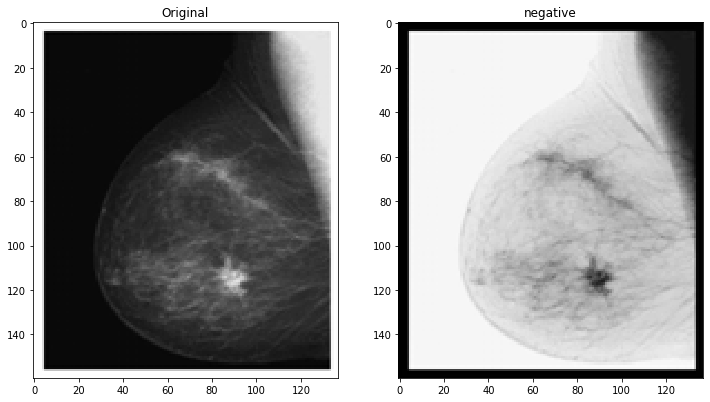

In [3]:
'''
1
Negative Transformation
'''
def Negative(orginal_img):
    neg_img=1-orginal_img
    show_images([orginal_img,neg_img],["Original","negative"])

img = io.imread('imgs/Picture1.png')
gray_img=rgb2gray(img)
Negative(gray_img)

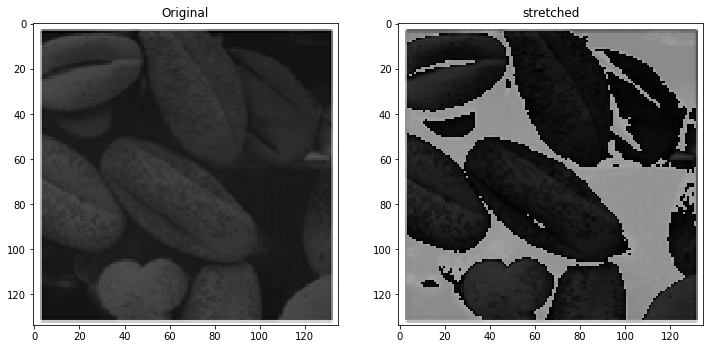

In [6]:
'''
2
Contrast Enhancement
'''



def contrast_enhancement(original_img):
    scaler = np.vectorize(lambda x: (x*1.5 + 50) if x <= 100 else x)
    grayscale = rgb2gray(img)
    grayscale *= 255
    enhanced_image = scaler(grayscale)
    show_images([grayscale,enhanced_image],["Original","stretched"])

img=io.imread('imgs/Picture2.png')
contrast_enhancement(img)


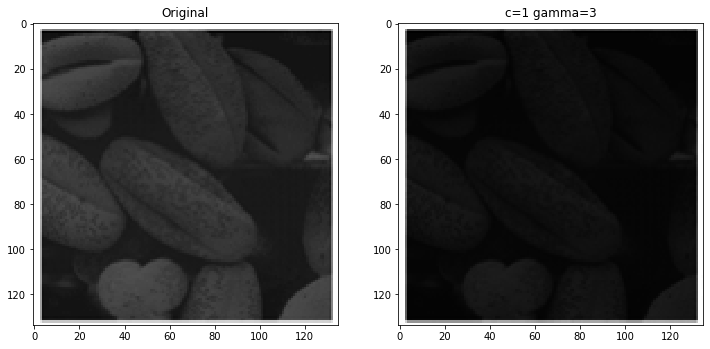

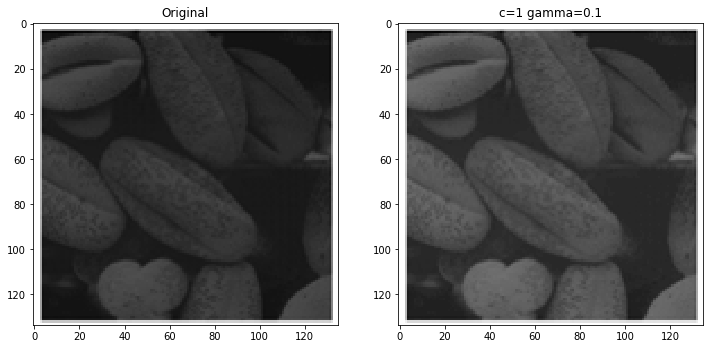

In [7]:
'''
3
Gamma Correction
'''


def Gamma_Correction(original_img,c,gamma):
    scaler = np.vectorize(lambda x:c*(x**gamma))
    grayscale = rgb2gray(img)
    grayscale *= 255
    gamma_img = scaler(grayscale)
    show_images([grayscale,gamma_img],["Original","c="+str(c)+" "+"gamma="+str(gamma)])

img=io.imread('imgs/Picture2.png')
Gamma_Correction(img,1,3)
Gamma_Correction(img,1,0.1)


[0.0]


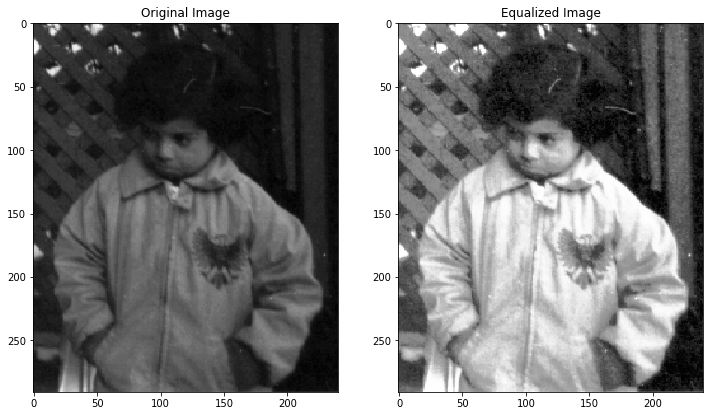

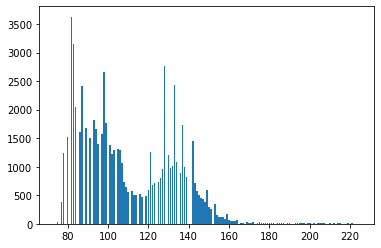

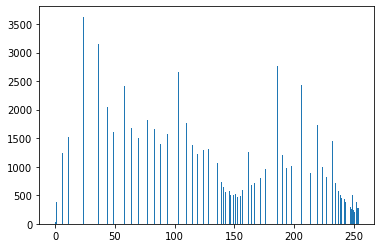

In [12]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(img,nbins=256):
    grayscale = rgb2gray(img)
    
    if issubclass(grayscale.dtype.type, np.floating):
        grayscale = (grayscale * 255).astype(int)
            
    hist = histogram(grayscale)
    frequencies, pixels = hist
    
    full_hist = np.zeros(256)
    for index in range(pixels.shape[0]):
        full_hist[pixels[index]] = frequencies[index]
    
    height, width = grayscale.shape
    image_size = height * width
    look_up_table = [full_hist[0] / image_size * 255]
    for pixel_value in range(1, 256):
        new_value = full_hist[pixel_value]/image_size * 255 + look_up_table[pixel_value - 1] 
        look_up_table.append(new_value)

   
    equalizer = np.vectorize(lambda x: look_up_table[x])
    equalized_img = equalizer(grayscale)
    show_images([grayscale, equalized_img], ['Original Image', 'Equalized Image'])
    showHist(grayscale)
    showHist(equalized_img)


        
img = io.imread('imgs/pout.tif')
getImageWithHist(img)
